In [2]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Read the CSV file using the 'latin-1' encoding
data = pd.read_csv("emails.csv")




In [4]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
# Renaming the columns
data = data.rename(columns={'Category': 'target', 'Message': 'text'})

In [7]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Assuming 'df' is your DataFrame and 'target' column contains 'ham' and 'spam'
data['target'] = data['target'].map({'ham': 0, 'spam': 1})


In [9]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.shape

(5572, 2)

In [11]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:

data['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [13]:
import seaborn as sns


<Axes: ylabel='count'>

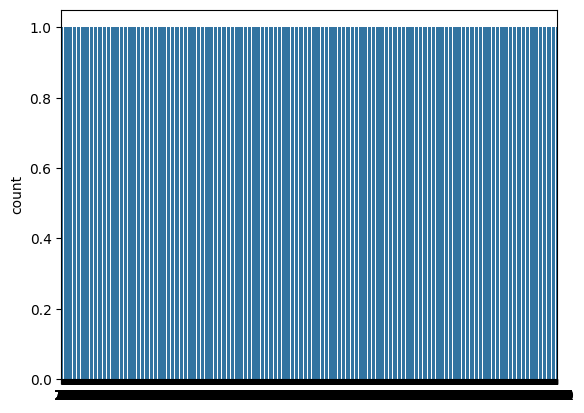

In [14]:
sns.countplot(data['target'])

In [15]:
data.duplicated().sum()

403

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
data.shape

(5169, 2)

In [20]:
5728 - 33

5695

<Axes: ylabel='count'>

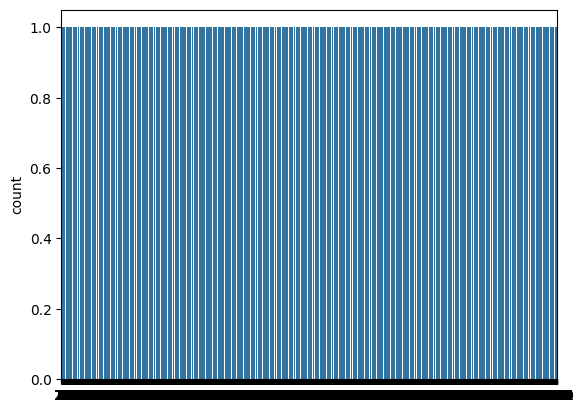

In [21]:
sns.countplot(data['target'])

In [22]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Separate in X and Y

In [23]:
X = data['text'].values
y = data['target'].values

In [24]:
y


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

Train - Test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [26]:
X_train.shape

(4135,)

In [27]:
X_test.shape

(1034,)

In [28]:
y_train.shape

(4135,)

In [29]:
y_test.shape


(1034,)

Preprocessing

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [32]:
len(x_train.toarray())

4135

In [33]:
len(x_train.toarray()[0])

7594

Training by ML Algorithm

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [35]:
x_test = cv.transform(X_test)

In [36]:
len(x_test.toarray())

1034

In [37]:
len(x_test.toarray()[0])

7594

In [38]:
from sklearn.naive_bayes import MultinomialNB

# Assuming x_train and y_train are your training data and labels
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Once the classifier is fitted, you can make predictions
y_pred = nb.predict(x_test)


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9816247582205029

In [41]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9929866989117292

Lets test using some emails

In [42]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [43]:
clean_email = cv.transform(email)

In [44]:
len(clean_email.toarray()[0])

7594

In [45]:
check = nb.predict(clean_email)[0]

In [46]:
check


0

Evaluation Function

In [51]:
email = ['Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030']


clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!


In [50]:
data['text'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'